In [82]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import random


In [83]:
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show

length = 5
x = [1, 2, 3, 4, 5]
ys = clusters[0][:length]

hover = HoverTool(
    tooltips=[
        ("(y)", "($y)"),
        ("gene", "@label"),
    ]
)

colors_list=[]
for i in range(length):
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    colors_list.append(color)
    
output_file("Bokeh Trend Plots/toolbar.html")

p = figure(title='figure', x_axis_label='Timepoint', y_axis_label='cdRPKM', tools=[hover])
multi_line_source = ColumnDataSource({
    'xs': [x]*5,
    'ys': ys,
    'label': genes[0][:5],
    'color': colors_list,
})
p.multi_line('xs', 'ys', color='color', source=multi_line_source)

show(p)

In [13]:
def check_val(x):
    if(x>0):
        return 1
    elif(x<0):
        return -1
    else:
        return 0

### RNASeq data

In [14]:
df_rnaseq = pd.read_csv('AdjustedRPKMOutput/RNASeq_chrE.txt',sep='\t')

In [15]:
df_rnaseq.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,50.0,6.605436,62.0,5.568612,71.0,5.308751,30.0,2.859319,51.0,3.102104
1,NM_001143986,TLE6,4.0,0.419612,6.0,0.427921,3.0,0.178120,3.0,0.227049,3.0,0.144899
2,NM_001003803,ATP5S,29.0,8.070253,52.0,9.838214,52.0,8.190209,19.0,3.814631,22.0,2.818815
3,NM_001003800,BICD2,778.0,54.632204,1155.0,55.141030,1444.0,57.390343,706.0,35.767093,883.0,28.548580
4,NM_016649,ESF1,17.0,1.199367,26.0,1.247097,10.0,0.399306,9.0,0.458095,20.0,0.649663


In [16]:
df_rnaseq.shape

(12429, 12)

In [17]:
df_rnaseq['finiteDiff1']=df_rnaseq['cdRPKM1']-df_rnaseq['cdRPKM0']
df_rnaseq['finiteDiff2']=df_rnaseq['cdRPKM2']-df_rnaseq['cdRPKM1']
df_rnaseq['finiteDiff3']=df_rnaseq['cdRPKM3']-df_rnaseq['cdRPKM2']
df_rnaseq['finiteDiff4']=df_rnaseq['cdRPKM4']-df_rnaseq['cdRPKM3']

In [18]:
df_rnaseq.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4,finiteDiff1,finiteDiff2,finiteDiff3,finiteDiff4
0,NM_017847,ODR4,50.0,6.605436,62.0,5.568612,71.0,5.308751,30.0,2.859319,51.0,3.102104,-1.036824,-0.259861,-2.449432,0.242785
1,NM_001143986,TLE6,4.0,0.419612,6.0,0.427921,3.0,0.178120,3.0,0.227049,3.0,0.144899,0.008308,-0.249801,0.048929,-0.082150
2,NM_001003803,ATP5S,29.0,8.070253,52.0,9.838214,52.0,8.190209,19.0,3.814631,22.0,2.818815,1.767961,-1.648005,-4.375578,-0.995817
3,NM_001003800,BICD2,778.0,54.632204,1155.0,55.141030,1444.0,57.390343,706.0,35.767093,883.0,28.548580,0.508825,2.249313,-21.623249,-7.218513
4,NM_016649,ESF1,17.0,1.199367,26.0,1.247097,10.0,0.399306,9.0,0.458095,20.0,0.649663,0.047730,-0.847792,0.058789,0.191568


In [19]:
df_rnaseq = df_rnaseq[(df_rnaseq['cdReads0'] >= 10) 
                      & (df_rnaseq['cdReads1'] >= 10) 
                      & (df_rnaseq['cdReads2'] >= 10)
                      & (df_rnaseq['cdReads3'] >= 10)
                      & (df_rnaseq['cdReads4'] >= 10)]

In [20]:
df_rnaseq.shape

(10341, 16)

In [21]:
df_rnaseq.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4,finiteDiff1,finiteDiff2,finiteDiff3,finiteDiff4
0,NM_017847,ODR4,50.0,6.605436,62.0,5.568612,71.0,5.308751,30.0,2.859319,51.0,3.102104,-1.036824,-0.259861,-2.449432,0.242785
2,NM_001003803,ATP5S,29.0,8.070253,52.0,9.838214,52.0,8.190209,19.0,3.814631,22.0,2.818815,1.767961,-1.648005,-4.375578,-0.995817
3,NM_001003800,BICD2,778.0,54.632204,1155.0,55.141030,1444.0,57.390343,706.0,35.767093,883.0,28.548580,0.508825,2.249313,-21.623249,-7.218513
5,NM_016647,THEM6,170.0,48.892869,182.0,35.587031,219.0,35.648661,91.0,18.881992,99.0,13.109511,-13.305839,0.061630,-16.766668,-5.772482
8,NM_016640,MRPS30,255.0,34.836170,348.0,32.321627,411.0,31.778583,205.0,20.204769,241.0,15.158699,-2.514542,-0.543044,-11.573814,-5.046070


In [22]:
print(abs(df_rnaseq['finiteDiff1']).min(),abs(df_rnaseq['finiteDiff2']).min(),
abs(df_rnaseq['finiteDiff3']).min(),abs(df_rnaseq['finiteDiff4']).min())

0.0007220484500010116 0.00028973213999972103 0.0007854384720000773 0.00017660104700001344


### Tolerance of same to be 10^-2

In [23]:
df_rnaseq['finiteDiff1'] = np.where(abs(df_rnaseq['finiteDiff1']) < 0.1, 0,
                                    df_rnaseq['finiteDiff1'])
df_rnaseq['finiteDiff2'] = np.where(abs(df_rnaseq['finiteDiff2']) < 0.1, 0,
                                    df_rnaseq['finiteDiff2'])
df_rnaseq['finiteDiff3'] = np.where(abs(df_rnaseq['finiteDiff3']) < 0.1, 0,
                                    df_rnaseq['finiteDiff3'])
df_rnaseq['finiteDiff4'] = np.where(abs(df_rnaseq['finiteDiff4']) < 0.1, 0,
                                    df_rnaseq['finiteDiff4'])

In [24]:
df_rnaseq.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4,finiteDiff1,finiteDiff2,finiteDiff3,finiteDiff4
0,NM_017847,ODR4,50.0,6.605436,62.0,5.568612,71.0,5.308751,30.0,2.859319,51.0,3.102104,-1.036824,-0.259861,-2.449432,0.242785
2,NM_001003803,ATP5S,29.0,8.070253,52.0,9.838214,52.0,8.190209,19.0,3.814631,22.0,2.818815,1.767961,-1.648005,-4.375578,-0.995817
3,NM_001003800,BICD2,778.0,54.632204,1155.0,55.141030,1444.0,57.390343,706.0,35.767093,883.0,28.548580,0.508825,2.249313,-21.623249,-7.218513
5,NM_016647,THEM6,170.0,48.892869,182.0,35.587031,219.0,35.648661,91.0,18.881992,99.0,13.109511,-13.305839,0.000000,-16.766668,-5.772482
8,NM_016640,MRPS30,255.0,34.836170,348.0,32.321627,411.0,31.778583,205.0,20.204769,241.0,15.158699,-2.514542,-0.543044,-11.573814,-5.046070


### Generate Trends

In [25]:
x = [-1,1,0]
trends = [p for p in itertools.product(x, repeat=4)]

In [26]:
print(len(trends))

81


In [27]:
df_rnaseq.keys()

Index(['AccNum', 'GeneName', 'cdReads0', 'cdRPKM0', 'cdReads1', 'cdRPKM1',
       'cdReads2', 'cdRPKM2', 'cdReads3', 'cdRPKM3', 'cdReads4', 'cdRPKM4',
       'finiteDiff1', 'finiteDiff2', 'finiteDiff3', 'finiteDiff4'],
      dtype='object')

In [28]:
X = df_rnaseq[['GeneName','cdRPKM0','cdRPKM1','cdRPKM2',
               'cdRPKM3','cdRPKM4','finiteDiff1', 'finiteDiff2',
               'finiteDiff3', 'finiteDiff4']].values

In [29]:
print(X[:5])

[['ODR4' 6.605436149500001 5.568611817130001 5.3087508083 2.85931874152
  3.1021040231299994 -1.0368243323700002 -0.25986100883000063
  -2.44943206678 0.24278528160999935]
 ['ATP5S' 8.0702527771 9.83821352996 8.1902089283 3.81463125315
  2.81881456713 1.7679607528600005 -1.6480046016600003 -4.375577675150001
  -0.99581668602]
 ['BICD2' 54.6322042655 55.141029642700005 57.390342504799996
  35.7670934322 28.5485803292 0.5088253772000044 2.249312862099991
  -21.623249072599997 -7.218513102999999]
 ['THEM6' 48.8928694894 35.587030759099996 35.6486605764
  18.881992423099998 13.1095108098 -13.305838730300003 0.0 -16.7666681533
  -5.772481613299998]
 ['MRPS30' 34.8361695112 32.3216273873 31.7785833837 20.2047693648
  15.1586994945 -2.5145421239 -0.5430440035999986 -11.573814018899999
  -5.0460698703]]


In [30]:
clusters = [[] for i in range(len(trends))]
genes = [[] for i in range(len(trends))]

In [31]:
print(clusters[:5],'\n',genes[:5])

[[], [], [], [], []] 
 [[], [], [], [], []]


In [32]:
for x in X:
    differences = x[-4:]
    trend_check = list(map(check_val, differences))
    for idx,t in enumerate(trends):
        if(list(t)==trend_check):
            clusters[idx].append(x[1:6])
            genes[idx].append(x[0])

In [33]:
clusters[1][0]

array([6.605436149500001, 5.568611817130001, 5.3087508083, 2.85931874152,
       3.1021040231299994], dtype=object)

In [34]:
for idx,c in enumerate(clusters):
    if(len(c)>0):
        print(trends[idx],len(c))

(-1, -1, -1, -1) 2885
(-1, -1, -1, 1) 541
(-1, -1, -1, 0) 209
(-1, -1, 1, -1) 26
(-1, -1, 0, -1) 30
(-1, -1, 0, 0) 5
(-1, 1, -1, -1) 1609
(-1, 1, -1, 1) 68
(-1, 1, -1, 0) 45
(-1, 1, 1, -1) 9
(-1, 1, 1, 1) 1
(-1, 1, 0, -1) 11
(-1, 1, 0, 1) 1
(-1, 0, -1, -1) 174
(-1, 0, -1, 1) 21
(-1, 0, -1, 0) 15
(-1, 0, 1, -1) 3
(-1, 0, 0, -1) 4
(-1, 0, 0, 0) 1
(1, -1, -1, -1) 2557
(1, -1, -1, 1) 489
(1, -1, -1, 0) 155
(1, -1, 1, -1) 20
(1, -1, 0, -1) 12
(1, -1, 0, 1) 3
(1, -1, 0, 0) 1
(1, 1, -1, -1) 806
(1, 1, -1, 1) 35
(1, 1, -1, 0) 13
(1, 1, 1, -1) 3
(1, 1, 0, -1) 1
(1, 0, -1, -1) 101
(1, 0, -1, 1) 6
(1, 0, -1, 0) 3
(1, 0, 0, -1) 1
(0, -1, -1, -1) 188
(0, -1, -1, 1) 65
(0, -1, -1, 0) 49
(0, -1, 1, -1) 6
(0, -1, 1, 0) 1
(0, -1, 0, -1) 4
(0, -1, 0, 1) 1
(0, -1, 0, 0) 3
(0, 1, -1, -1) 102
(0, 1, -1, 1) 7
(0, 1, -1, 0) 10
(0, 1, 0, -1) 3
(0, 0, -1, -1) 23
(0, 0, -1, 1) 2
(0, 0, -1, 0) 8
(0, 0, 0, -1) 2
(0, 0, 0, 0) 3


In [35]:
def generate_title(trend,mapping):
    s = ''
    for t in trend:
        s+=mapping[t]
    return s

In [36]:
mapping = {1:'I',-1:'D',0:'S'}
print(generate_title((-1, -1, -1, -1),mapping))

DDDD


In [37]:
CDRPKM_LIST = ['cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']

In [67]:
print(clusters[0][:2])

[array([34.8361695112, 32.3216273873, 31.7785833837, 20.2047693648,
       15.1586994945], dtype=object), array([24.5027190278, 22.8898604933, 15.607203748800002, 8.78173025656,
       7.061597688180001], dtype=object)]


In [86]:
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show


for idx,c in enumerate(clusters):
    if(len(c)>0):
        x = [1, 2, 3, 4, 5]
        ys = c
        title = generate_title(trends[idx],mapping)
        hover = HoverTool(
        tooltips=[
            ("(cdRPKM)", "($y)"),
            ("gene", "@label"),]
        )
        colors_list=[]
        for i in range(len(c)):
            color = "#%06x" % random.randint(0, 0xFFFFFF)
            colors_list.append(color)
        output_file("Bokeh Trend Plots/"+title+".html")
        actual_title = title+":"+str(len(c))+" genes"
        p = figure(title=actual_title, x_axis_label='Timepoint', y_axis_label='cdRPKM', tools=[hover])
        multi_line_source = ColumnDataSource({
            'xs': [x]*len(c),
            'ys': ys,
            'label': genes[idx],
            'color': colors_list,
        })
        p.multi_line('xs', 'ys', color='color', source=multi_line_source)
        show(p)

(-1, -1, -1, -1) 2885


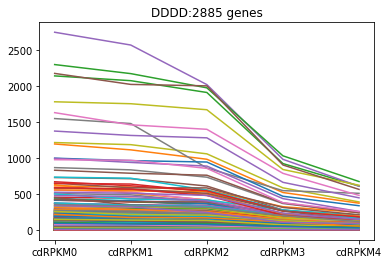

(-1, -1, -1, 1) 541


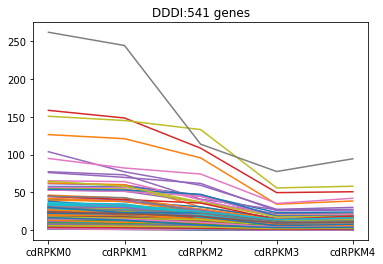

(-1, -1, -1, 0) 209


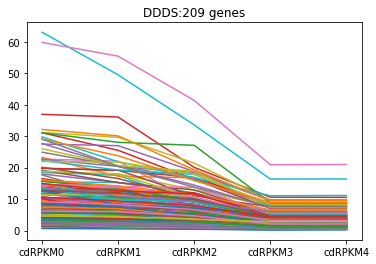

(-1, -1, 1, -1) 26


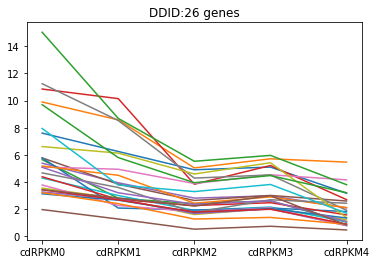

(-1, -1, 0, -1) 30


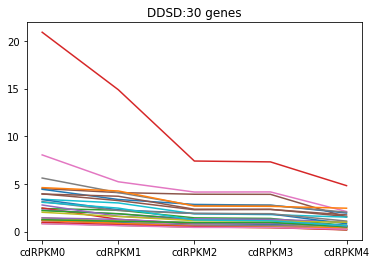

(-1, -1, 0, 0) 5


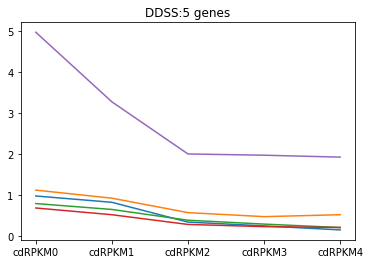

(-1, 1, -1, -1) 1609


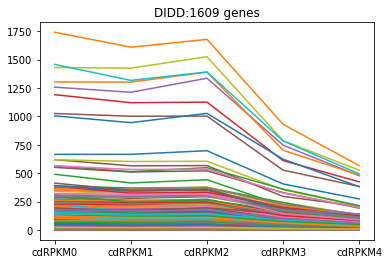

(-1, 1, -1, 1) 68


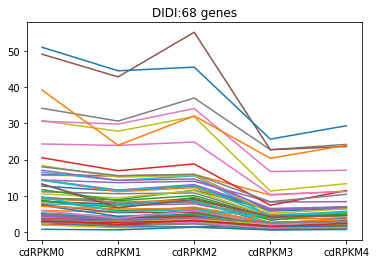

(-1, 1, -1, 0) 45


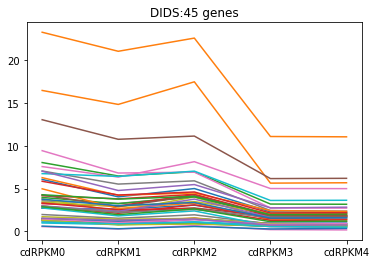

(-1, 1, 1, -1) 9


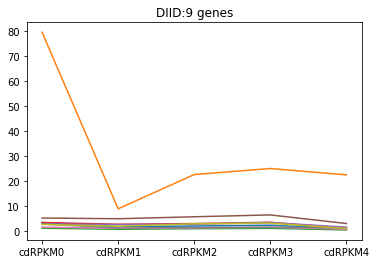

(-1, 1, 1, 1) 1


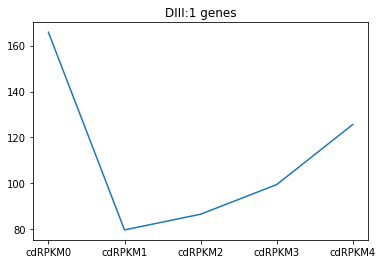

(-1, 1, 0, -1) 11


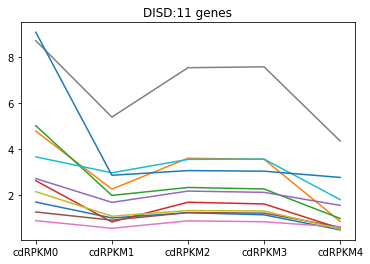

(-1, 1, 0, 1) 1


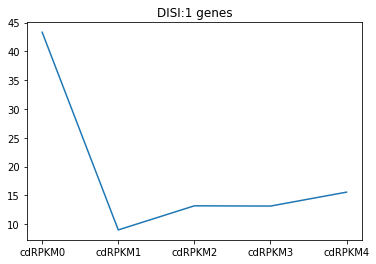

(-1, 0, -1, -1) 174


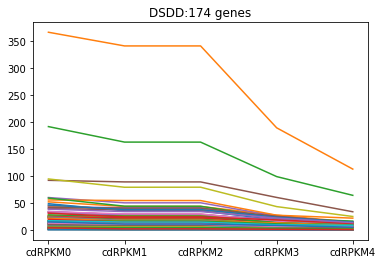

(-1, 0, -1, 1) 21


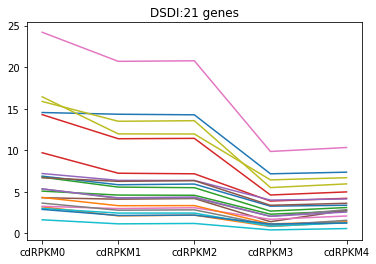

(-1, 0, -1, 0) 15


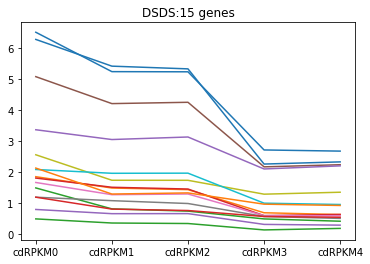

(-1, 0, 1, -1) 3


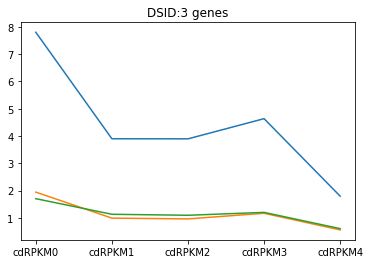

(-1, 0, 0, -1) 4


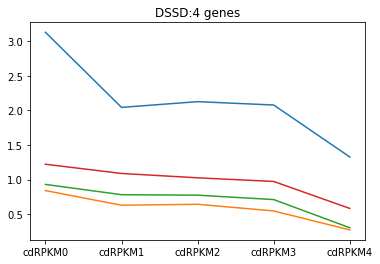

(-1, 0, 0, 0) 1


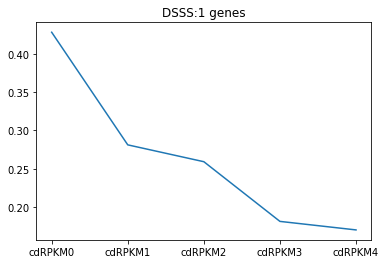

(1, -1, -1, -1) 2557


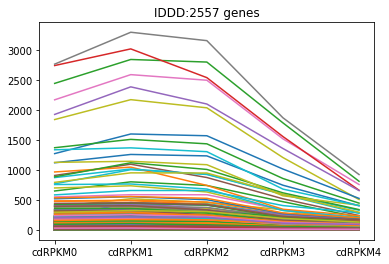

(1, -1, -1, 1) 489


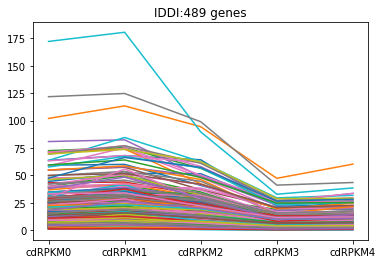

(1, -1, -1, 0) 155


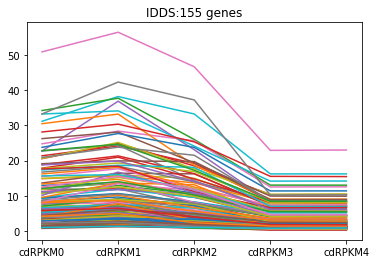

(1, -1, 1, -1) 20


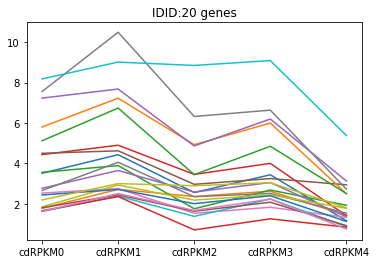

(1, -1, 0, -1) 12


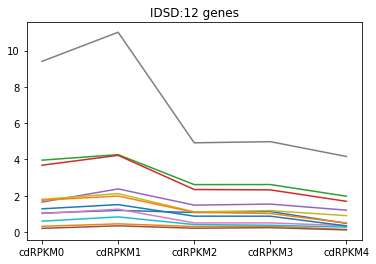

(1, -1, 0, 1) 3


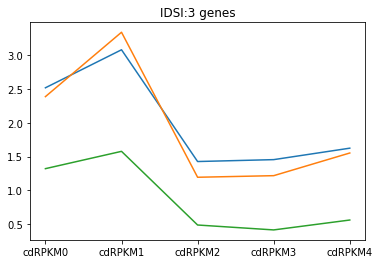

(1, -1, 0, 0) 1


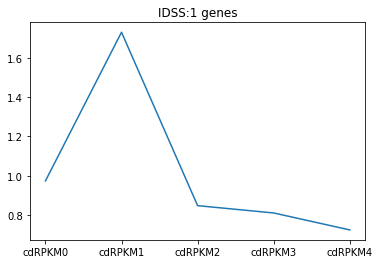

(1, 1, -1, -1) 806


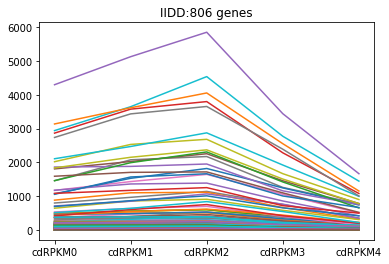

(1, 1, -1, 1) 35


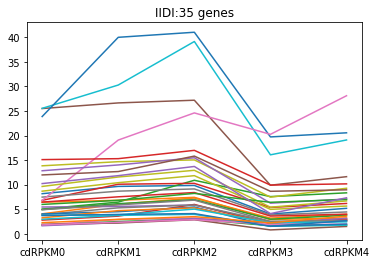

(1, 1, -1, 0) 13


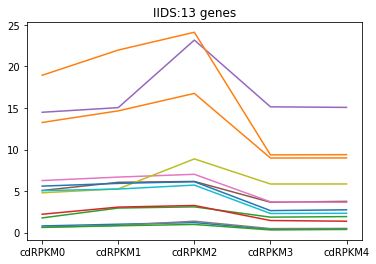

(1, 1, 1, -1) 3


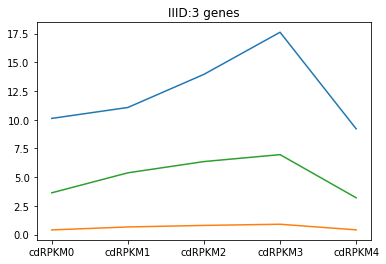

(1, 1, 0, -1) 1


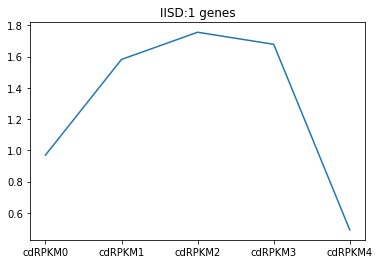

(1, 0, -1, -1) 101


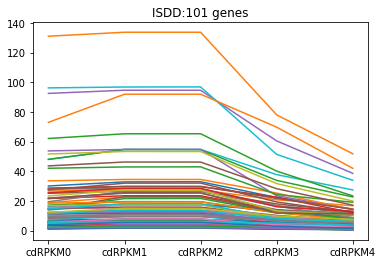

(1, 0, -1, 1) 6


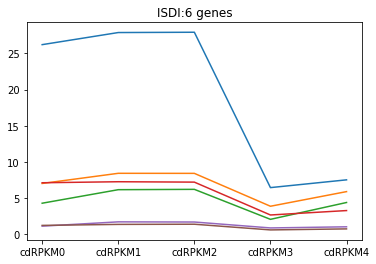

(1, 0, -1, 0) 3


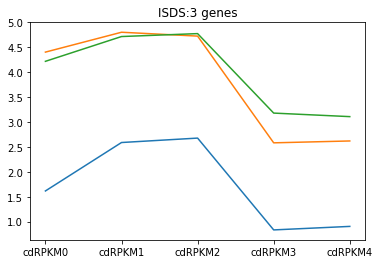

(1, 0, 0, -1) 1


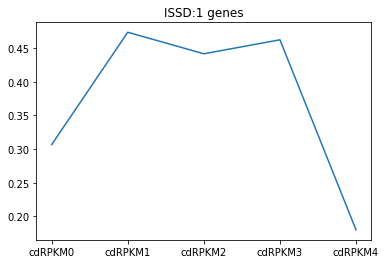

(0, -1, -1, -1) 188


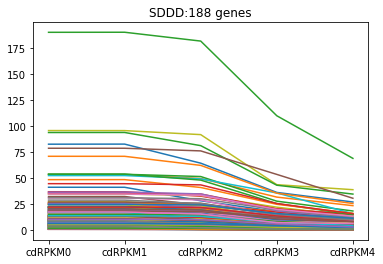

(0, -1, -1, 1) 65


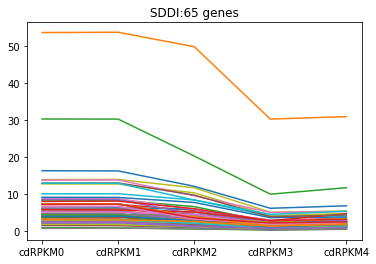

(0, -1, -1, 0) 49


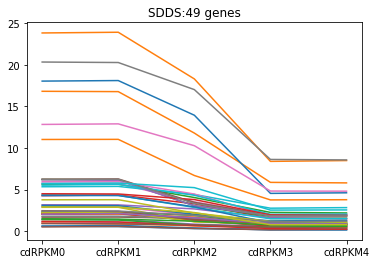

(0, -1, 1, -1) 6


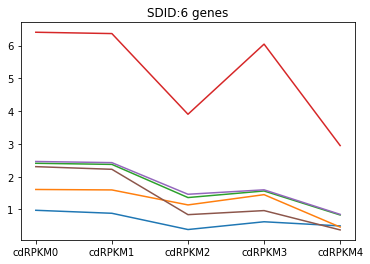

(0, -1, 1, 0) 1


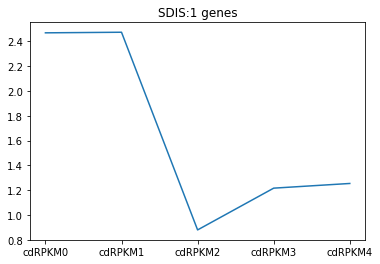

(0, -1, 0, -1) 4


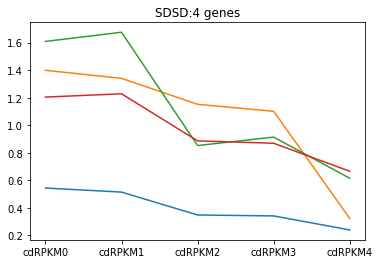

(0, -1, 0, 1) 1


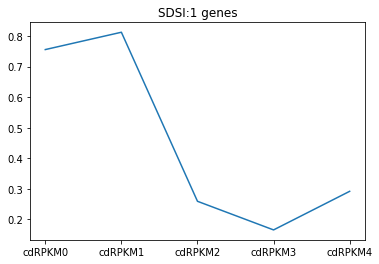

(0, -1, 0, 0) 3


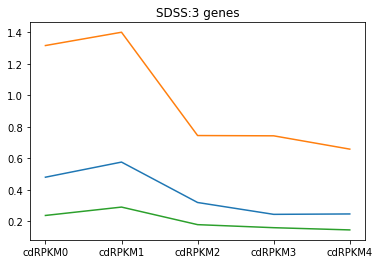

(0, 1, -1, -1) 102


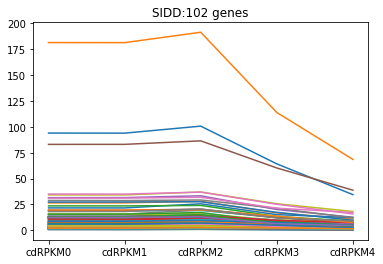

(0, 1, -1, 1) 7


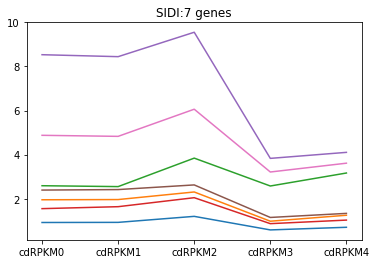

(0, 1, -1, 0) 10


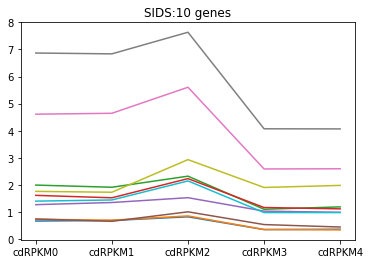

(0, 1, 0, -1) 3


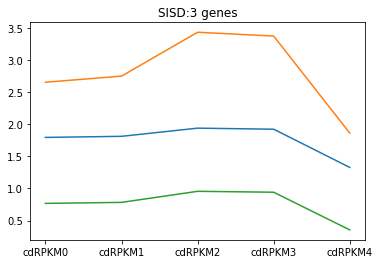

(0, 0, -1, -1) 23


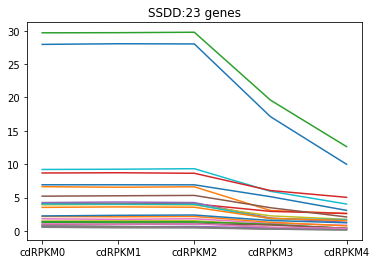

(0, 0, -1, 1) 2


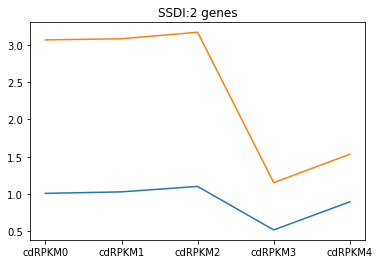

(0, 0, -1, 0) 8


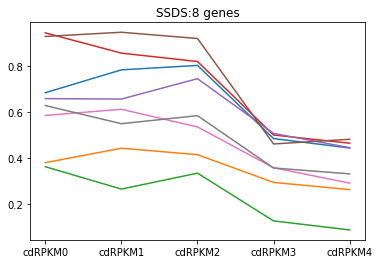

(0, 0, 0, -1) 2


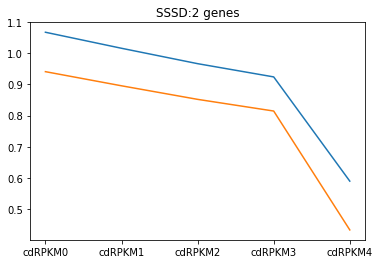

(0, 0, 0, 0) 3


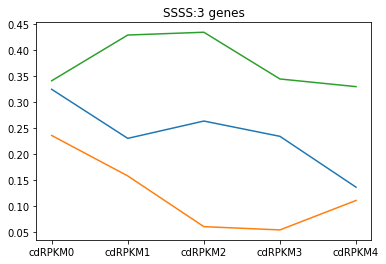

In [28]:
for idx,c in enumerate(clusters):
    if(len(c)>0):
        fig = plt.subplot(111)
        title = generate_title(trends[idx],mapping)
        print(trends[idx],len(c))
        for el in c:
            fig.plot(CDRPKM_LIST, el)
        actual_title = title+":"+str(len(c))+" genes"
        plt.title(actual_title)
        plt.savefig('/Users/akankshitadash/Desktop/Trends/RNASeq/Plots/'+title)
        plt.show()
        with open('/Users/akankshitadash/Desktop/Trends/RNASeq/Genes/'+title+'.txt','w') as f:
            f.write('\n'.join(genes[idx]))

### TE Data

In [49]:
df_te = pd.read_csv('AdjustedRPKMOutput/TE_chrE.txt',sep='\t')
df_te['finiteDiff1']=df_te['TE1']-df_te['TE0']
df_te['finiteDiff2']=df_te['TE2']-df_te['TE1']
df_te['finiteDiff3']=df_te['TE3']-df_te['TE2']
df_te['finiteDiff4']=df_te['TE4']-df_te['TE3']

In [50]:
print(abs(df_te['finiteDiff1']).min(),abs(df_te['finiteDiff2']).min(),
abs(df_te['finiteDiff3']).min(),abs(df_te['finiteDiff4']).min())

4.34087904221947e-06 4.062556532558048e-05 1.1623685327033506e-05 1.0911591452500424e-05


In [52]:
print(df_te['TE0'].max(),df_te['TE0'].min())
print(df_te['TE1'].max(),df_te['TE1'].min())
print(df_te['TE2'].max(),df_te['TE2'].min())
print(df_te['TE3'].max(),df_te['TE3'].min())
print(df_te['TE4'].max(),df_te['TE4'].min())

21.639904566324603 0.028826660674268232
18.714204070667694 0.06527466844287776
71.6111994893856 0.09126721167629548
50.11016606761263 0.11044312156478106
130.4165749337216 0.11921530369135575


In [53]:
df_te['finiteDiff1'] = np.where(abs(df_te['finiteDiff1']) < 10**(-4), 0,
                                    df_te['finiteDiff1'])
df_te['finiteDiff2'] = np.where(abs(df_te['finiteDiff2']) < 10**(-4), 0,
                                    df_te['finiteDiff2'])
df_te['finiteDiff3'] = np.where(abs(df_te['finiteDiff3']) < 10**(-4), 0,
                                    df_te['finiteDiff3'])
df_te['finiteDiff4'] = np.where(abs(df_te['finiteDiff4']) < 10**(-4), 0,
                                    df_te['finiteDiff4'])

In [54]:
df_te.keys()

Index(['Unnamed: 0', 'AccNum', 'GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4',
       'finiteDiff1', 'finiteDiff2', 'finiteDiff3', 'finiteDiff4'],
      dtype='object')

In [ ]:
X = df_rnaseq[['GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4',
       'finiteDiff1', 'finiteDiff2', 'finiteDiff3', 'finiteDiff4']].values

In [ ]:
clusters = [[] for i in range(len(trends))]
genes = [[] for i in range(len(trends))]

In [ ]:
for x in X:
    differences = x[-4:]
    trend_check = list(map(check_val, differences))
    for idx,t in enumerate(trends):
        if(list(t)==trend_check):
            clusters[idx].append(x[1:6])
            genes[idx].append(x[0])
TE_LIST = ['TE0', 'TE1', 'TE2', 'TE3', 'TE4']

In [ ]:
for idx,c in enumerate(clusters):
    if(len(c)>0):
        fig = plt.subplot(111)
        title = generate_title(trends[idx],mapping)
        print(trends[idx],len(c))
        for el in c:
            fig.plot(CDRPKM_LIST, el)
        actual_title = title+":"+str(len(c))+" genes"
        plt.title(actual_title)
        plt.savefig('/Users/akankshitadash/Desktop/Trends/Plots/'+title)
        plt.show()
        with open('/Users/akankshitadash/Desktop/Trends/Genes/'+title+'.txt','w') as f:
            f.write('\n'.join(genes[idx]))